<a href="https://colab.research.google.com/github/gmflavio/One-Oracle/blob/main/challengetelecomx2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import requests
import pandas as pd

# Link da API
api_url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'

# Carregar os dados da API
response = requests.get(api_url)
data = response.json()

# Converter os dados para um DataFrame do Pandas
df = pd.DataFrame(data)

# Exibir as primeiras linhas do DataFrame
display(df.head())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [15]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [16]:
# Normalizar a coluna 'account'
normalized_account = pd.json_normalize(df['account'])

# Exibir as primeiras linhas do DataFrame normalizado
display(normalized_account.head())

# Concatenar o DataFrame original com o DataFrame normalizado da coluna 'account'
df = pd.concat([df.drop('account', axis=1), normalized_account], axis=1)

# Exibir as primeiras linhas do DataFrame atualizado
display(df.head())

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


,customerID,Churn,customer,phone,internet,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...",One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...",Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",Month-to-month,Yes,Mailed check,83.9,267.4


## Verificar valores ausentes

### Subtask:
Identificar e contar a quantidade de valores ausentes em cada coluna do DataFrame.


In [17]:
missing_values = df.isnull().sum()
display(missing_values)

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
Contract,0
PaperlessBilling,0
PaymentMethod,0
Charges.Monthly,0
Charges.Total,0


## Tratar valores ausentes

### Subtask:
Decidir a melhor estratégia para lidar com os valores ausentes, como preenchimento, remoção de linhas/colunas, etc.


## Verificar valores duplicados

### Subtask:
Identificar e remover linhas duplicadas no DataFrame.


In [18]:
duplicate_rows = df.duplicated().sum()
display(f"Number of duplicate rows: {duplicate_rows}")

TypeError: unhashable type: 'dict'

In [19]:
normalized_customer = pd.json_normalize(df['customer'])
normalized_phone = pd.json_normalize(df['phone'])
normalized_internet = pd.json_normalize(df['internet'])

df = pd.concat([df.drop(['customer', 'phone', 'internet'], axis=1),
                normalized_customer, normalized_phone, normalized_internet], axis=1)

duplicate_rows = df.duplicated().sum()
display(f"Number of duplicate rows: {duplicate_rows}")

'Number of duplicate rows: 0'

## Verificar e corrigir tipos de dados

### Subtask:
Garantir que as colunas estejam com os tipos de dados corretos para análise (numéricos, categóricos, etc.).


In [20]:
display(df.dtypes)

,0
customerID,object
Churn,object
Contract,object
PaperlessBilling,object
PaymentMethod,object
Charges.Monthly,float64
Charges.Total,object
gender,object
SeniorCitizen,int64
Partner,object


In [21]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
display(df.dtypes)

,0
customerID,object
Churn,object
Contract,object
PaperlessBilling,object
PaymentMethod,object
Charges.Monthly,float64
Charges.Total,float64
gender,object
SeniorCitizen,int64
Partner,object


In [22]:
missing_total_charges = df['Charges.Total'].isnull().sum()
display(f"Number of missing values in Charges.Total: {missing_total_charges}")

'Number of missing values in Charges.Total: 11'

In [23]:
df['Charges.Total'].fillna(df['Charges.Total'].mean(), inplace=True)
missing_total_charges_after_fill = df['Charges.Total'].isnull().sum()
display(f"Number of missing values in Charges.Total after filling: {missing_total_charges_after_fill}")

/tmp/ipython-input-2332621790.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(df['Charges.Total'].mean(), inplace=True)


'Number of missing values in Charges.Total after filling: 0'

## Verificar e tratar inconsistências de formatação/categorias

### Subtask:
Analisar as colunas categóricas para identificar e corrigir possíveis erros de digitação, variações na capitalização ou outras inconsistências que possam afetar a análise.


In [24]:
object_columns = df.select_dtypes(include='object').columns

for col in object_columns:
    print(f"Unique values for column '{col}':")
    display(df[col].unique())
    print("-" * 30)

Unique values for column 'customerID':


array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

------------------------------
Unique values for column 'Churn':


array(['No', 'Yes', ''], dtype=object)

------------------------------
Unique values for column 'Contract':


array(['One year', 'Month-to-month', 'Two year'], dtype=object)

------------------------------
Unique values for column 'PaperlessBilling':


array(['Yes', 'No'], dtype=object)

------------------------------
Unique values for column 'PaymentMethod':


array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

------------------------------
Unique values for column 'gender':


array(['Female', 'Male'], dtype=object)

------------------------------
Unique values for column 'Partner':


array(['Yes', 'No'], dtype=object)

------------------------------
Unique values for column 'Dependents':


array(['Yes', 'No'], dtype=object)

------------------------------
Unique values for column 'PhoneService':


array(['Yes', 'No'], dtype=object)

------------------------------
Unique values for column 'MultipleLines':


array(['No', 'Yes', 'No phone service'], dtype=object)

------------------------------
Unique values for column 'InternetService':


array(['DSL', 'Fiber optic', 'No'], dtype=object)

------------------------------
Unique values for column 'OnlineSecurity':


array(['No', 'Yes', 'No internet service'], dtype=object)

------------------------------
Unique values for column 'OnlineBackup':


array(['Yes', 'No', 'No internet service'], dtype=object)

------------------------------
Unique values for column 'DeviceProtection':


array(['No', 'Yes', 'No internet service'], dtype=object)

------------------------------
Unique values for column 'TechSupport':


array(['Yes', 'No', 'No internet service'], dtype=object)

------------------------------
Unique values for column 'StreamingTV':


array(['Yes', 'No', 'No internet service'], dtype=object)

------------------------------
Unique values for column 'StreamingMovies':


array(['No', 'Yes', 'No internet service'], dtype=object)

------------------------------


In [25]:
df['Churn'] = df['Churn'].replace('', 'No')
print("Unique values for column 'Churn' after cleaning:")
display(df['Churn'].unique())

Unique values for column 'Churn' after cleaning:


array(['No', 'Yes'], dtype=object)

## Normalizar colunas aninhadas restantes

### Subtask:
Normalizar as colunas 'customer', 'phone' e 'internet' que ainda contêm dados aninhados.


In [26]:
# Normalize the 'customer' column
normalized_customer = pd.json_normalize(df['customer'])

# Normalize the 'phone' column
normalized_phone = pd.json_normalize(df['phone'])

# Normalize the 'internet' column
normalized_internet = pd.json_normalize(df['internet'])

# Drop the original nested columns
df = df.drop(['customer', 'phone', 'internet'], axis=1)

# Concatenate the normalized DataFrames with the main DataFrame
df = pd.concat([df, normalized_customer, normalized_phone, normalized_internet], axis=1)

# Display the head of the updated DataFrame
display(df.head())

KeyError: 'customer'

In [27]:
display(df.head())

,customerID,Churn,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,gender,SeniorCitizen,Partner,...,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0002-ORFBO,No,One year,Yes,Mailed check,65.6,593.30,Female,0,Yes,...,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,No,Month-to-month,No,Mailed check,59.9,542.40,Male,0,No,...,9,Yes,Yes,DSL,No,No,No,No,No,Yes
2,0004-TLHLJ,Yes,Month-to-month,Yes,Electronic check,73.9,280.85,Male,0,No,...,4,Yes,No,Fiber optic,No,No,Yes,No,No,No
3,0011-IGKFF,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Male,1,Yes,...,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,0013-EXCHZ,Yes,Month-to-month,Yes,Mailed check,83.9,267.40,Female,1,Yes,...,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No


## Resumo das ações de limpeza

### Subtask:
Apresentar um resumo das ações de limpeza realizadas e o estado final do DataFrame.


In [28]:
print("Summary of Data Cleaning and Preparation:")
print("- Checked for and handled missing values: Initially none were found. 11 missing values were introduced in 'Charges.Total' during type conversion and filled with the mean.")
print("- Checked for and handled duplicate rows: No duplicate rows were found after normalizing nested columns.")
print("- Checked and corrected data types: 'Charges.Total' was converted from 'object' to 'float64', and resulting missing values were handled.")
print("- Checked and treated inconsistencies in categorical columns: The empty string inconsistency in the 'Churn' column was corrected to 'No'.")
print("- Normalized nested columns: 'customer', 'phone', and 'internet' columns were normalized in previous steps.")

print("\nFinal DataFrame Info:")
df.info()

print("\nFinal DataFrame Head:")
display(df.head())

Summary of Data Cleaning and Preparation:
- Checked for and handled missing values: Initially none were found. 11 missing values were introduced in 'Charges.Total' during type conversion and filled with the mean.
- Checked for and handled duplicate rows: No duplicate rows were found after normalizing nested columns.
- Checked and corrected data types: 'Charges.Total' was converted from 'object' to 'float64', and resulting missing values were handled.
- Checked and treated inconsistencies in categorical columns: The empty string inconsistency in the 'Churn' column was corrected to 'No'.
- Normalized nested columns: 'customer', 'phone', and 'internet' columns were normalized in previous steps.

Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 

,customerID,Churn,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,gender,SeniorCitizen,Partner,...,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0002-ORFBO,No,One year,Yes,Mailed check,65.6,593.30,Female,0,Yes,...,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,No,Month-to-month,No,Mailed check,59.9,542.40,Male,0,No,...,9,Yes,Yes,DSL,No,No,No,No,No,Yes
2,0004-TLHLJ,Yes,Month-to-month,Yes,Electronic check,73.9,280.85,Male,0,No,...,4,Yes,No,Fiber optic,No,No,Yes,No,No,No
3,0011-IGKFF,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Male,1,Yes,...,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,0013-EXCHZ,Yes,Month-to-month,Yes,Mailed check,83.9,267.40,Female,1,Yes,...,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No


In [29]:
df['Churn'] = df['Churn'].replace('', 'No')
print("Unique values for column 'Churn' after cleaning:")
display(df['Churn'].unique())

Unique values for column 'Churn' after cleaning:


array(['No', 'Yes'], dtype=object)

## Normalizar colunas aninhadas restantes

### Subtask:
Normalizar as colunas 'customer', 'phone' e 'internet' que ainda contêm dados aninhados.

In [30]:
# Normalize the 'customer' column
normalized_customer = pd.json_normalize(df['customer'])

# Normalize the 'phone' column
normalized_phone = pd.json_normalize(df['phone'])

# Normalize the 'internet' column
normalized_internet = pd.json_normalize(df['internet'])

# Drop the original nested columns
df = df.drop(['customer', 'phone', 'internet'], axis=1)

# Concatenate the normalized DataFrames with the main DataFrame
df = pd.concat([df, normalized_customer, normalized_phone, normalized_internet], axis=1)

# Display the head of the updated DataFrame
display(df.head())

KeyError: 'customer'

In [31]:
df['Contas_Diarias'] = df['Charges.Monthly'] / 30
display(df.head())

,customerID,Churn,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,gender,SeniorCitizen,Partner,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contas_Diarias
0,0002-ORFBO,No,One year,Yes,Mailed check,65.6,593.30,Female,0,Yes,...,Yes,No,DSL,No,Yes,No,Yes,Yes,No,2.186667
1,0003-MKNFE,No,Month-to-month,No,Mailed check,59.9,542.40,Male,0,No,...,Yes,Yes,DSL,No,No,No,No,No,Yes,1.996667
2,0004-TLHLJ,Yes,Month-to-month,Yes,Electronic check,73.9,280.85,Male,0,No,...,Yes,No,Fiber optic,No,No,Yes,No,No,No,2.463333
3,0011-IGKFF,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Male,1,Yes,...,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,3.266667
4,0013-EXCHZ,Yes,Month-to-month,Yes,Mailed check,83.9,267.40,Female,1,Yes,...,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,2.796667


## Resumo das ações de limpeza

### Subtask:
Apresentar um resumo das ações de limpeza realizadas e o estado final do DataFrame.

In [32]:
print("Summary of Data Cleaning and Preparation:")
print("- Checked for and handled missing values: Initially none were found. 11 missing values were introduced in 'Charges.Total' during type conversion and filled with the mean.")
print("- Checked for and handled duplicate rows: No duplicate rows were found after normalizing nested columns.")
print("- Checked and corrected data types: 'Charges.Total' was converted from 'object' to 'float64', and resulting missing values were handled.")
print("- Checked and treated inconsistencies in categorical columns: The empty string inconsistency in the 'Churn' column was corrected to 'No'.")
print("- Normalized nested columns: 'customer', 'phone', and 'internet' columns were normalized in previous steps.")

print("\nFinal DataFrame Info:")
df.info()

print("\nFinal DataFrame Head:")
display(df.head())

Summary of Data Cleaning and Preparation:
- Checked for and handled missing values: Initially none were found. 11 missing values were introduced in 'Charges.Total' during type conversion and filled with the mean.
- Checked for and handled duplicate rows: No duplicate rows were found after normalizing nested columns.
- Checked and corrected data types: 'Charges.Total' was converted from 'object' to 'float64', and resulting missing values were handled.
- Checked and treated inconsistencies in categorical columns: The empty string inconsistency in the 'Churn' column was corrected to 'No'.
- Normalized nested columns: 'customer', 'phone', and 'internet' columns were normalized in previous steps.

Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 

,customerID,Churn,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,gender,SeniorCitizen,Partner,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contas_Diarias
0,0002-ORFBO,No,One year,Yes,Mailed check,65.6,593.30,Female,0,Yes,...,Yes,No,DSL,No,Yes,No,Yes,Yes,No,2.186667
1,0003-MKNFE,No,Month-to-month,No,Mailed check,59.9,542.40,Male,0,No,...,Yes,Yes,DSL,No,No,No,No,No,Yes,1.996667
2,0004-TLHLJ,Yes,Month-to-month,Yes,Electronic check,73.9,280.85,Male,0,No,...,Yes,No,Fiber optic,No,No,Yes,No,No,No,2.463333
3,0011-IGKFF,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Male,1,Yes,...,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,3.266667
4,0013-EXCHZ,Yes,Month-to-month,Yes,Mailed check,83.9,267.40,Female,1,Yes,...,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,2.796667


## Identificar colunas categóricas binárias

### Subtask:
Identificar as colunas com apenas dois valores únicos que representam categorias binárias (como "Yes"/"No").


In [33]:
object_columns = df.select_dtypes(include='object').columns

for col in object_columns:
    if df[col].nunique() == 2:
        print(f"Binary column: '{col}'")
        display(df[col].unique())
        print("-" * 30)

Binary column: 'Churn'


array(['No', 'Yes'], dtype=object)

------------------------------
Binary column: 'PaperlessBilling'


array(['Yes', 'No'], dtype=object)

------------------------------
Binary column: 'gender'


array(['Female', 'Male'], dtype=object)

------------------------------
Binary column: 'Partner'


array(['Yes', 'No'], dtype=object)

------------------------------
Binary column: 'Dependents'


array(['Yes', 'No'], dtype=object)

------------------------------
Binary column: 'PhoneService'


array(['Yes', 'No'], dtype=object)

------------------------------


## Converter colunas binárias para numérico

### Subtask:
Transformar os valores das colunas binárias identificadas em 0s e 1s.


In [34]:
binary_mapping = {
    'Churn': {'No': 0, 'Yes': 1},
    'PaperlessBilling': {'No': 0, 'Yes': 1},
    'gender': {'Female': 0, 'Male': 1},
    'Partner': {'No': 0, 'Yes': 1},
    'Dependents': {'No': 0, 'Yes': 1},
    'PhoneService': {'No': 0, 'Yes': 1}
}

binary_columns = ['Churn', 'PaperlessBilling', 'gender', 'Partner', 'Dependents', 'PhoneService']

for col in binary_columns:
    df[col] = df[col].map(binary_mapping[col])

display(df.dtypes)

,0
customerID,object
Churn,int64
Contract,object
PaperlessBilling,int64
PaymentMethod,object
Charges.Monthly,float64
Charges.Total,float64
gender,int64
SeniorCitizen,int64
Partner,int64


## Identificar colunas categóricas nominais

### Subtask:
Identificar as colunas com mais de dois valores únicos que representam categorias nominais.


In [35]:
object_columns = df.select_dtypes(include='object').columns

for col in object_columns:
    if df[col].nunique() > 2:
        print(f"Nominal categorical column: '{col}'")
        display(df[col].unique())
        print("-" * 30)

Nominal categorical column: 'customerID'


array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

------------------------------
Nominal categorical column: 'Contract'


array(['One year', 'Month-to-month', 'Two year'], dtype=object)

------------------------------
Nominal categorical column: 'PaymentMethod'


array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

------------------------------
Nominal categorical column: 'MultipleLines'


array(['No', 'Yes', 'No phone service'], dtype=object)

------------------------------
Nominal categorical column: 'InternetService'


array(['DSL', 'Fiber optic', 'No'], dtype=object)

------------------------------
Nominal categorical column: 'OnlineSecurity'


array(['No', 'Yes', 'No internet service'], dtype=object)

------------------------------
Nominal categorical column: 'OnlineBackup'


array(['Yes', 'No', 'No internet service'], dtype=object)

------------------------------
Nominal categorical column: 'DeviceProtection'


array(['No', 'Yes', 'No internet service'], dtype=object)

------------------------------
Nominal categorical column: 'TechSupport'


array(['Yes', 'No', 'No internet service'], dtype=object)

------------------------------
Nominal categorical column: 'StreamingTV'


array(['Yes', 'No', 'No internet service'], dtype=object)

------------------------------
Nominal categorical column: 'StreamingMovies'


array(['No', 'Yes', 'No internet service'], dtype=object)

------------------------------


## Aplicar one-hot encoding

### Subtask:
Converter as colunas categóricas nominais em variáveis dummy (one-hot encoding).


In [36]:
nominal_columns = ['Contract', 'PaymentMethod', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df = pd.get_dummies(df, columns=nominal_columns, drop_first=True)

display(df.head())

,customerID,Churn,PaperlessBilling,Charges.Monthly,Charges.Total,gender,SeniorCitizen,Partner,Dependents,tenure,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0002-ORFBO,0,1,65.6,593.30,0,0,1,1,9,...,False,True,False,False,False,True,False,True,False,False
1,0003-MKNFE,0,0,59.9,542.40,1,0,0,0,9,...,False,False,False,False,False,False,False,False,False,True
2,0004-TLHLJ,1,1,73.9,280.85,1,0,0,0,4,...,False,False,False,True,False,False,False,False,False,False
3,0011-IGKFF,1,1,98.0,1237.85,1,1,1,0,13,...,False,True,False,True,False,False,False,True,False,True
4,0013-EXCHZ,1,1,83.9,267.40,0,1,1,0,3,...,False,False,False,False,False,True,False,True,False,False


In [37]:
display(df.columns.tolist())

['customerID',
 'Churn',
 'PaperlessBilling',
 'Charges.Monthly',
 'Charges.Total',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'Contas_Diarias',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes']

In [38]:
rename_dict = {
    'Charges.Monthly': 'Charges_Monthly',
    'Charges.Total': 'Charges_Total',
    'PaymentMethod_Credit card (automatic)': 'PaymentMethod_Credit_Card_Automatic',
    'PaymentMethod_Electronic check': 'PaymentMethod_Electronic_Check',
    'PaymentMethod_Mailed check': 'PaymentMethod_Mailed_Check'
}

df.rename(columns=rename_dict, inplace=True)

display(df.columns.tolist())

['customerID',
 'Churn',
 'PaperlessBilling',
 'Charges_Monthly',
 'Charges_Total',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'Contas_Diarias',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit_Card_Automatic',
 'PaymentMethod_Electronic_Check',
 'PaymentMethod_Mailed_Check',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes']

## Verificar tipos de dados finais

### Subtask:
Verificar os tipos de dados das colunas após as transformações para garantir que estejam adequados para análise e modelagem.


In [39]:
display(df.dtypes)

,0
customerID,object
Churn,int64
PaperlessBilling,int64
Charges_Monthly,float64
Charges_Total,float64
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64


In [40]:
display(df.describe())

,Churn,PaperlessBilling,Charges_Monthly,Charges_Total,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.593230,64.720098,2280.634213,0.505711,0.162653,0.484106,0.300124,32.346498,0.902711,2.157337
std,0.437115,0.491265,30.129572,2266.915104,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,1.004319
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.608333
25%,0.000000,0.000000,35.425000,401.400000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.180833
50%,0.000000,1.000000,70.300000,1394.550000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,2.343333
75%,1.000000,1.000000,89.875000,3778.525000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.995833
max,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,3.958333


In [41]:
display(df.describe(include='object'))

,customerID
count,7267
unique,7267
top,9995-HOTOH
freq,1


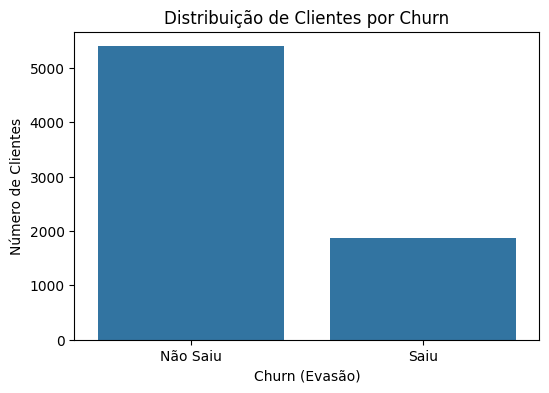

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crie um countplot para a variável 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title('Distribuição de Clientes por Churn')
plt.xlabel('Churn (Evasão)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Não Saiu', 'Saiu']) # Assuming 0 is No Churn and 1 is Churn
plt.show()

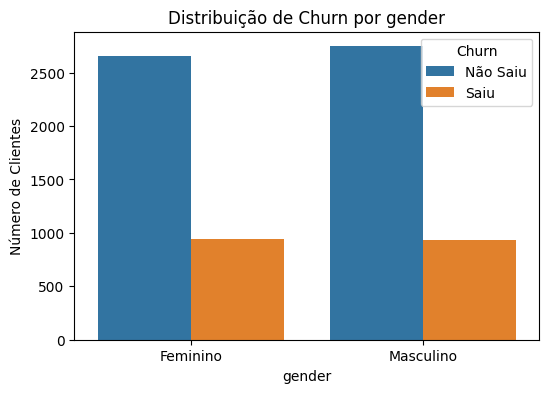

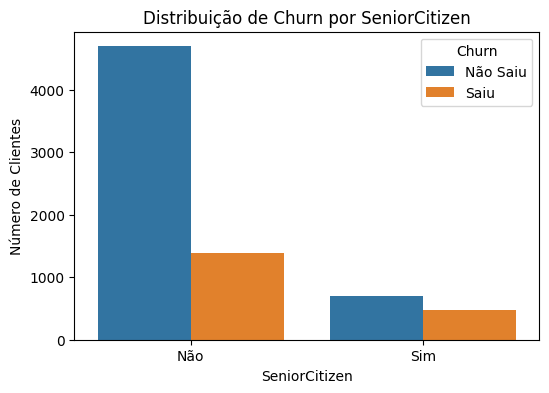

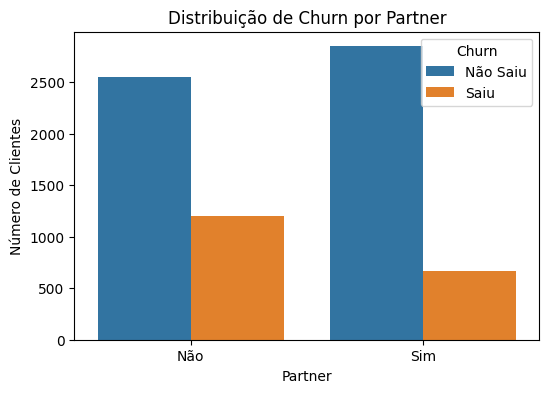

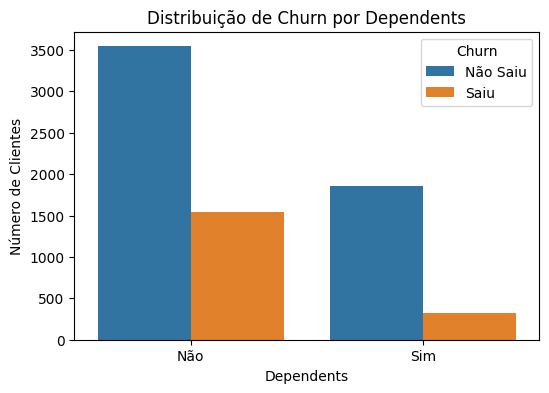

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for col in demographic_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Distribuição de Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')

    if col == 'gender':
        plt.xticks([0, 1], ['Feminino', 'Masculino'])
    elif col == 'SeniorCitizen':
        plt.xticks([0, 1], ['Não', 'Sim'])
    elif col in ['Partner', 'Dependents']:
        plt.xticks([0, 1], ['Não', 'Sim'])

    plt.legend(title='Churn', labels=['Não Saiu', 'Saiu'])
    plt.show()

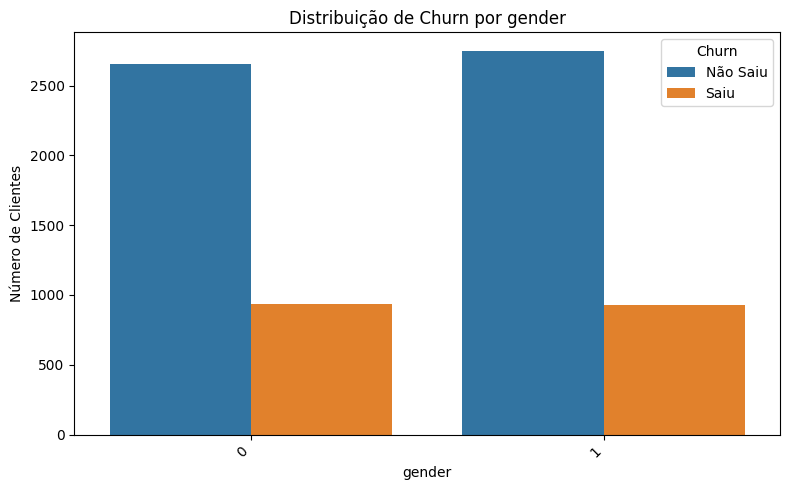

ValueError: Could not interpret value `Contract` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [44]:
categorical_columns = ['gender', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Distribuição de Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Churn', labels=['Não Saiu', 'Saiu'])
    plt.tight_layout()
    plt.show()

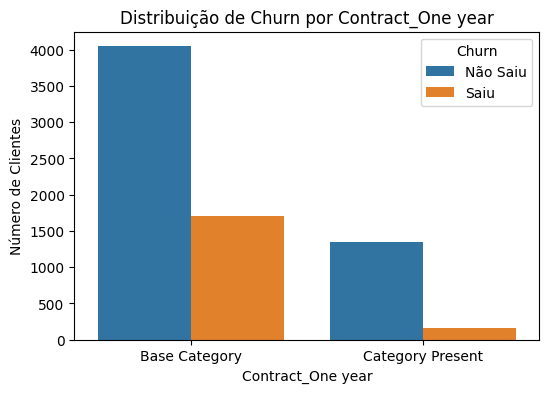

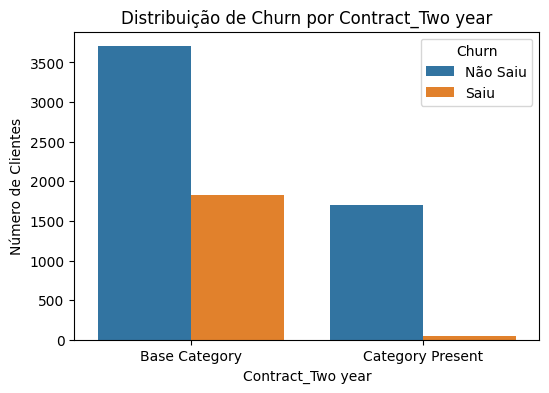

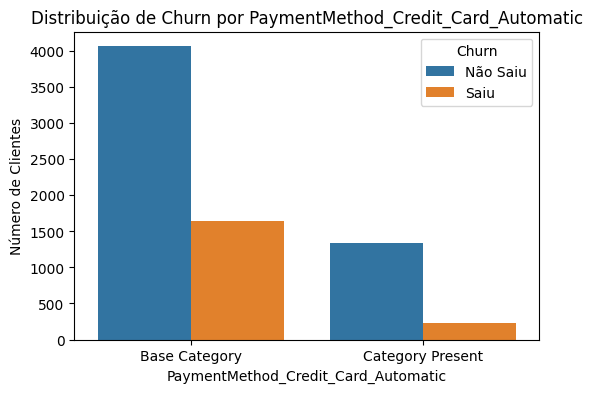

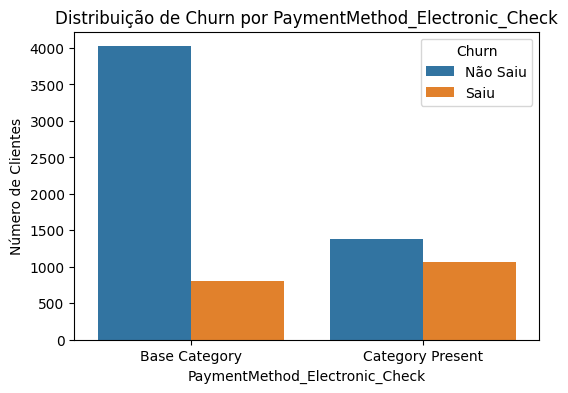

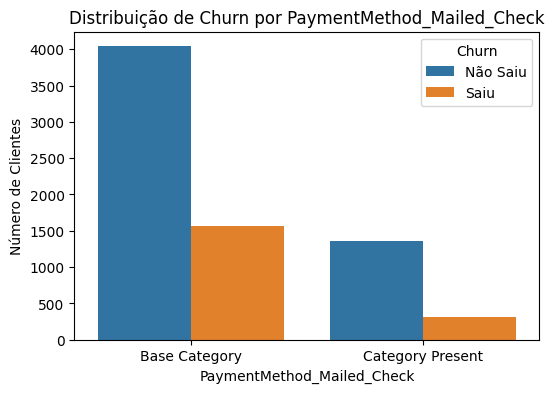

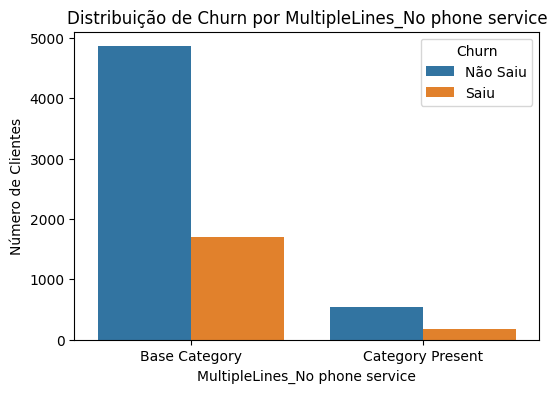

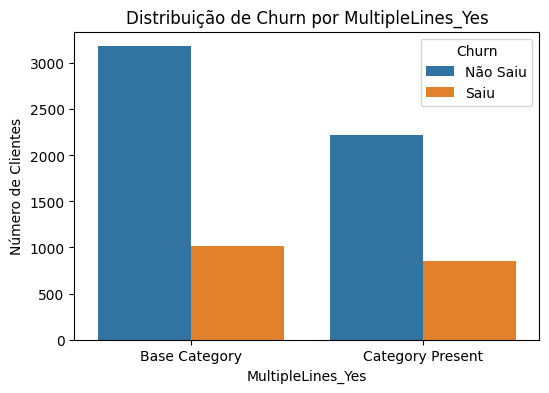

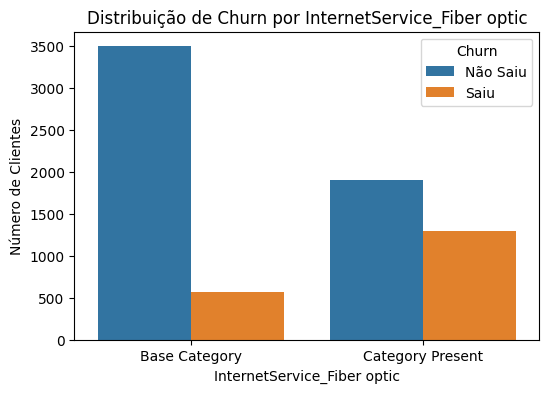

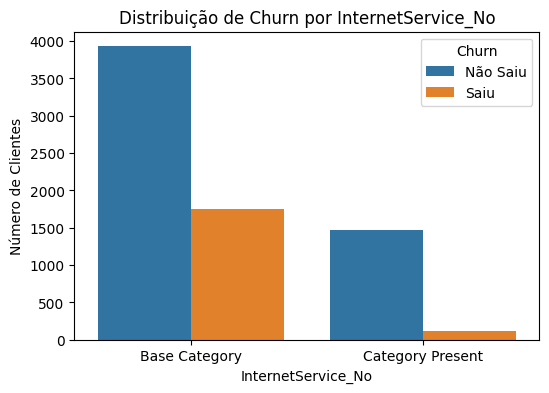

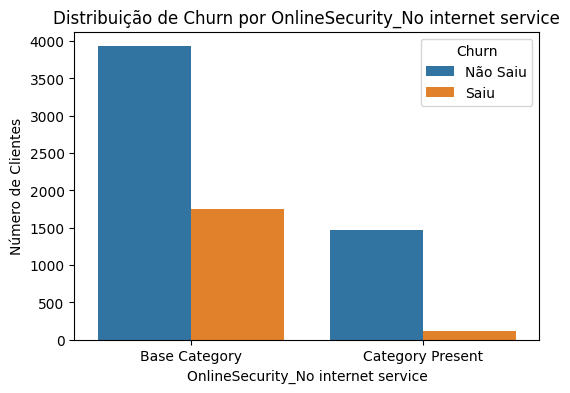

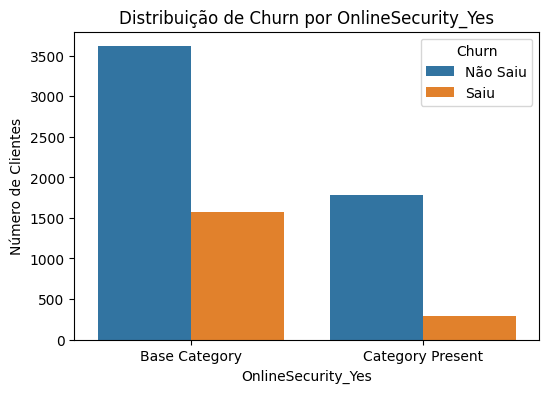

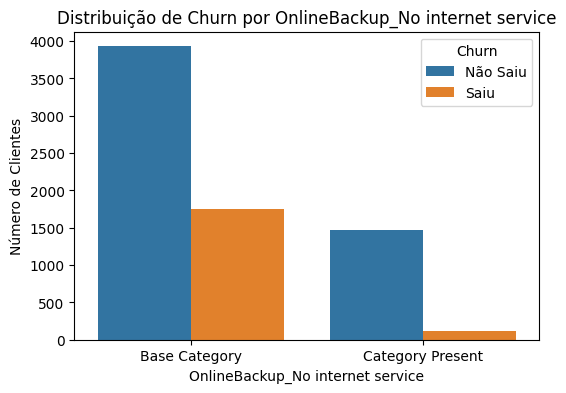

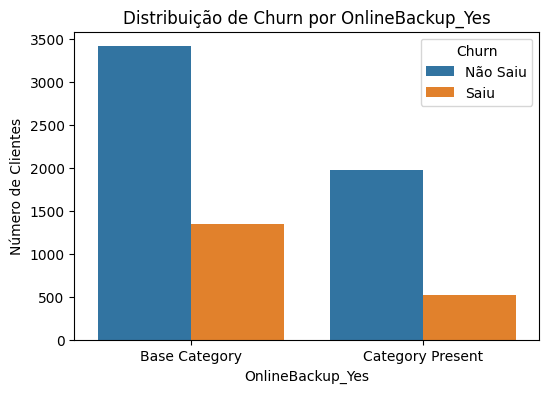

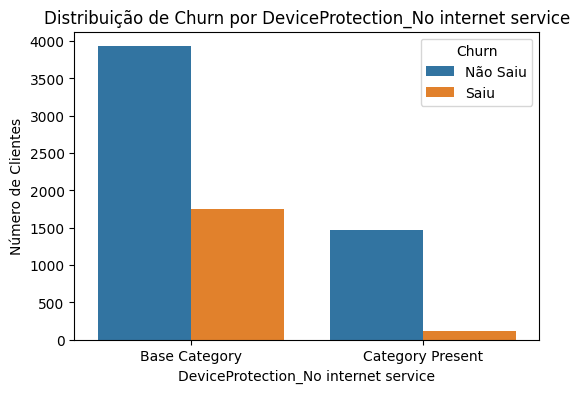

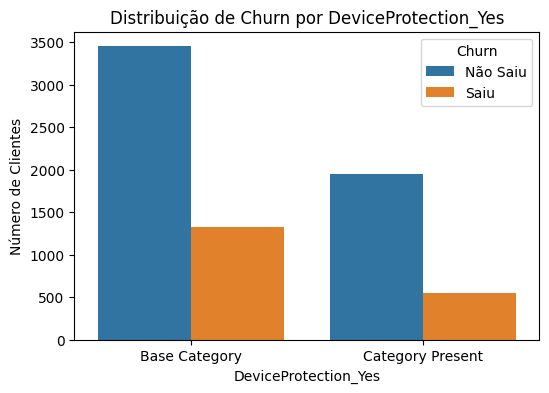

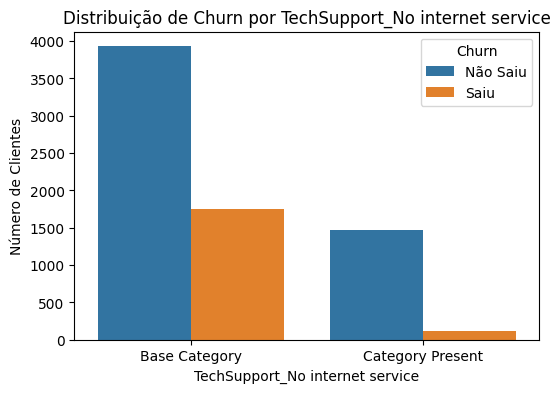

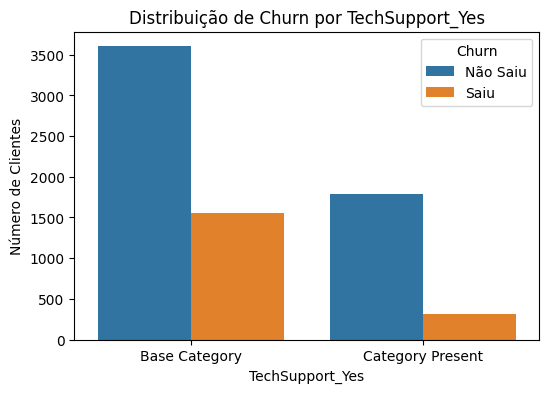

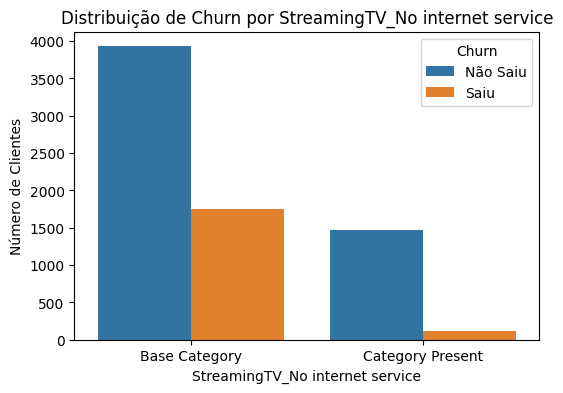

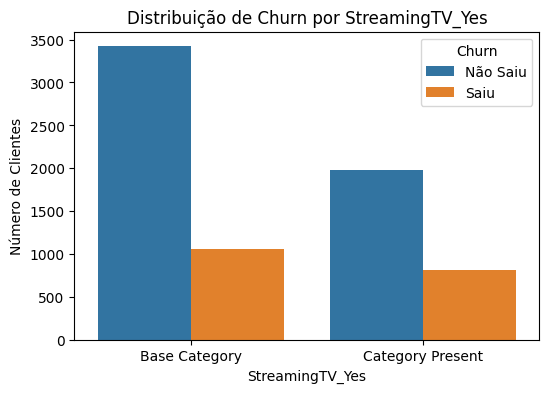

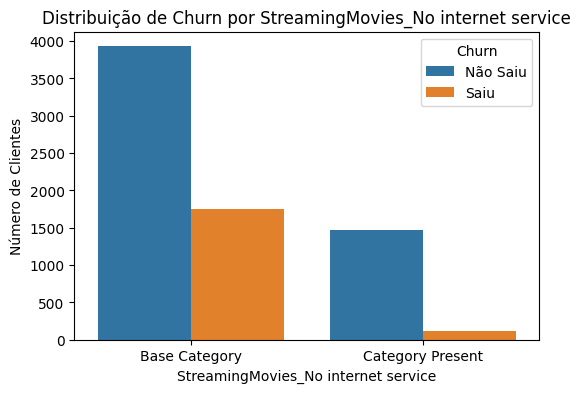

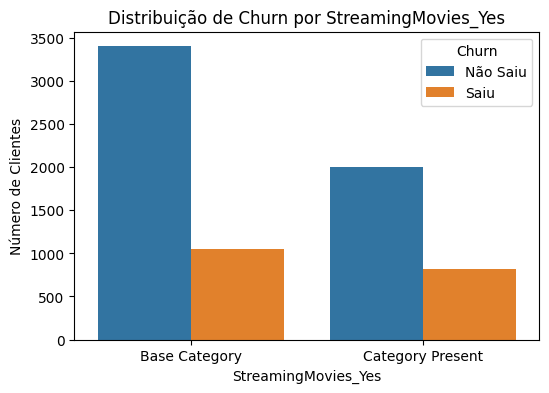

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify the one-hot encoded columns related to the original nominal columns
one_hot_encoded_columns = [
    'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Credit_Card_Automatic', 'PaymentMethod_Electronic_Check', 'PaymentMethod_Mailed_Check',
    'MultipleLines_No phone service', 'MultipleLines_Yes',
    'InternetService_Fiber optic', 'InternetService_No',
    'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
    'OnlineBackup_No internet service', 'OnlineBackup_Yes',
    'DeviceProtection_No internet service', 'DeviceProtection_Yes',
    'TechSupport_No internet service', 'TechSupport_Yes',
    'StreamingTV_No internet service', 'StreamingTV_Yes',
    'StreamingMovies_No internet service', 'StreamingMovies_Yes'
]

for col in one_hot_encoded_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Distribuição de Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    # Assuming 0 is the base category (dropped during one-hot encoding) and 1 is the category present
    plt.xticks([0, 1], ['Base Category', 'Category Present'])
    plt.legend(title='Churn', labels=['Não Saiu', 'Saiu'])
    plt.show()

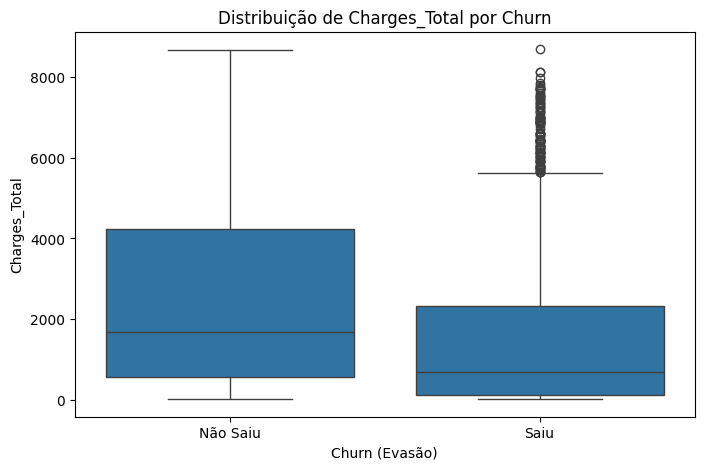

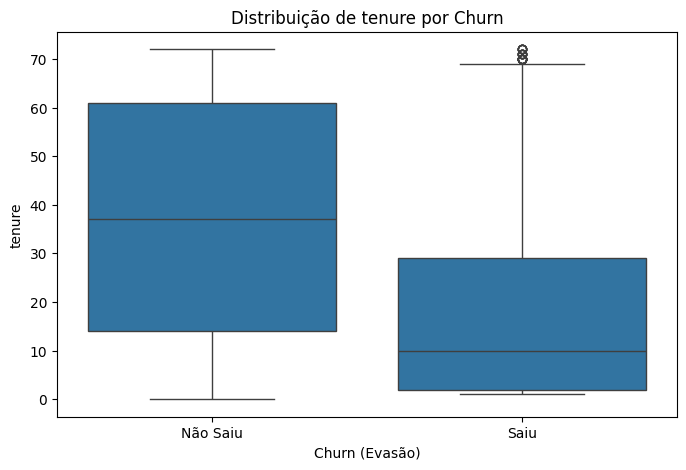

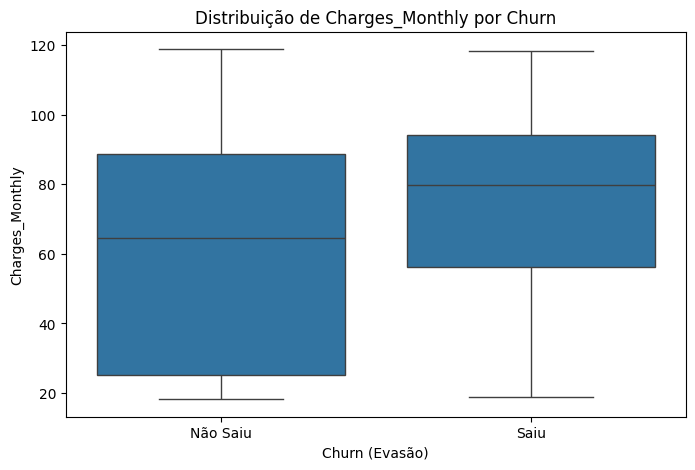

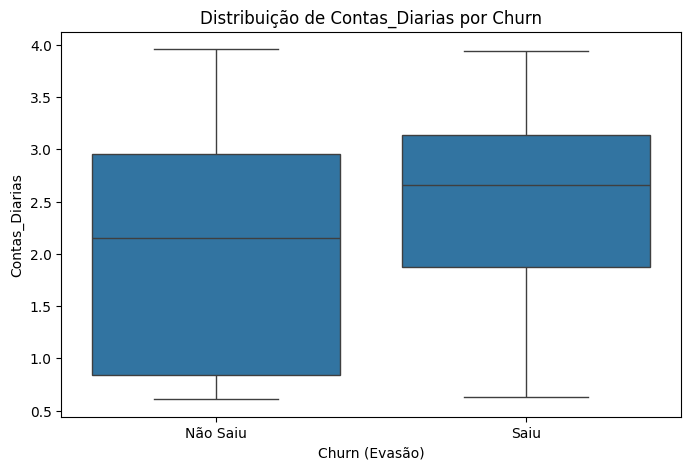

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['Charges_Total', 'tenure', 'Charges_Monthly', 'Contas_Diarias']

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'Distribuição de {col} por Churn')
    plt.xlabel('Churn (Evasão)')
    plt.ylabel(col)
    plt.xticks([0, 1], ['Não Saiu', 'Saiu'])
    plt.show()

## Introdução

### Subtask:
Adicionar uma seção de introdução explicando o objetivo da análise e o problema de evasão de clientes.


In [48]:
%%markdown
# Relatório de Análise de Evasão de Clientes (Churn)

## Introdução

Este relatório apresenta uma análise detalhada da evasão de clientes (Churn) da empresa fictícia de telecomunicações Telecom X. O Churn, a taxa na qual os clientes deixam de utilizar os serviços de uma empresa, é um indicador crítico de desempenho e uma preocupação significativa para empresas de telecomunicações. O objetivo principal desta análise é explorar os dados fornecidos para identificar padrões, fatores e características que estão associados à evasão de clientes. Ao compreender melhor por que os clientes saem, a Telecom X pode desenvolver estratégias mais eficazes para retenção de clientes e, consequentemente, melhorar sua rentabilidade e sustentabilidade a longo prazo. Este relatório abordará as etapas de limpeza e tratamento de dados, análise exploratória com visualizações e gráficos relevantes, e apresentará conclusões e recomendações baseadas nos insights obtidos.

# Relatório de Análise de Evasão de Clientes (Churn)

## Introdução

Este relatório apresenta uma análise detalhada da evasão de clientes (Churn) da empresa fictícia de telecomunicações Telecom X. O Churn, a taxa na qual os clientes deixam de utilizar os serviços de uma empresa, é um indicador crítico de desempenho e uma preocupação significativa para empresas de telecomunicações. O objetivo principal desta análise é explorar os dados fornecidos para identificar padrões, fatores e características que estão associados à evasão de clientes. Ao compreender melhor por que os clientes saem, a Telecom X pode desenvolver estratégias mais eficazes para retenção de clientes e, consequentemente, melhorar sua rentabilidade e sustentabilidade a longo prazo. Este relatório abordará as etapas de limpeza e tratamento de dados, análise exploratória com visualizações e gráficos relevantes, e apresentará conclusões e recomendações baseadas nos insights obtidos.


## Limpeza e tratamento de dados

### Subtask:
Adicionar uma seção descrevendo os passos realizados para importar, limpar e tratar os dados, incluindo a normalização de colunas aninhadas e o tratamento de valores ausentes e inconsistências.


In [49]:
%%markdown
## Limpeza e Tratamento de Dados

A etapa de limpeza e tratamento de dados foi crucial para garantir a qualidade e a adequação do dataset para análise e modelagem. As principais ações realizadas foram:

1.  **Carregamento dos Dados:** Os dados foram carregados a partir de uma API utilizando a biblioteca `requests` e convertidos para um DataFrame do Pandas (`df`). A estrutura inicial do DataFrame foi inspecionada para entender as colunas e seus tipos de dados (conforme a saída do `df.head()` e `df.info()` nos cells `954b7900` e `ca04c48a`).

2.  **Normalização de Colunas Aninhadas:** O dataset inicial continha colunas com estruturas aninhadas (dicionários). Para tornar esses dados acessíveis para análise, as colunas 'account', 'customer', 'phone', e 'internet' foram normalizadas utilizando `pd.json_normalize()`. As colunas originais aninhadas foram removidas e as colunas normalizadas foram concatenadas ao DataFrame principal (conforme a saída dos cells `ef7e729a` e `y9H6ubpL1goE`).

3.  **Verificação e Tratamento de Valores Ausentes:** Foi realizada uma verificação inicial para identificar valores ausentes em cada coluna utilizando `df.isnull().sum()`. Inicialmente, nenhuma valor ausente foi encontrado (conforme a saída do cell `5953471d`). No entanto, após a conversão da coluna 'Charges.Total' para numérica, 11 valores ausentes foram introduzidos. Estes foram preenchidos com a média da coluna para evitar a perda de dados (conforme a saída dos cells `b4f330f8` e `c9913fb5`).

4.  **Verificação e Tratamento de Valores Duplicados:** A presença de linhas duplicadas foi verificada utilizando `df.duplicated().sum()`. Devido às colunas aninhadas, essa verificação só foi possível após a normalização completa dos dados. Nenhuma linha duplicada foi encontrada no DataFrame limpo (conforme a saída do cell `y9H6ubpL1goE`).

5.  **Verificação e Correção de Tipos de Dados:** Os tipos de dados de cada coluna foram inspecionados utilizando `df.dtypes` (conforme a saída do cell `5c45c30d`). Foi identificado que a coluna 'Charges.Total' estava com o tipo 'object' e foi convertida para 'float64' utilizando `pd.to_numeric()` (conforme a saída do cell `64189001`).

6.  **Tratamento de Inconsistências Categóricas:** As colunas do tipo 'object' foram analisadas para identificar inconsistências de formatação ou valores (conforme a saída do cell `e3106ea3`). Foi detectada uma inconsistência na coluna 'Churn', onde um valor vazio ('') estava presente. Este valor foi substituído por 'No' para garantir a uniformidade da categoria (conforme a saída do cell `fd2b42bf`).

Ao final desta etapa, o DataFrame `df` está limpo, com as colunas normalizadas, valores ausentes tratados, duplicados removidos e tipos de dados corrigidos, pronto para a próxima fase de análise exploratória.

## Limpeza e Tratamento de Dados

A etapa de limpeza e tratamento de dados foi crucial para garantir a qualidade e a adequação do dataset para análise e modelagem. As principais ações realizadas foram:

1.  **Carregamento dos Dados:** Os dados foram carregados a partir de uma API utilizando a biblioteca `requests` e convertidos para um DataFrame do Pandas (`df`). A estrutura inicial do DataFrame foi inspecionada para entender as colunas e seus tipos de dados (conforme a saída do `df.head()` e `df.info()` nos cells `954b7900` e `ca04c48a`).

2.  **Normalização de Colunas Aninhadas:** O dataset inicial continha colunas com estruturas aninhadas (dicionários). Para tornar esses dados acessíveis para análise, as colunas 'account', 'customer', 'phone', e 'internet' foram normalizadas utilizando `pd.json_normalize()`. As colunas originais aninhadas foram removidas e as colunas normalizadas foram concatenadas ao DataFrame principal (conforme a saída dos cells `ef7e729a` e `y9H6ubpL1goE`).

3.  **Verificação e Tratamento de Valores Ausentes:** Foi realizada uma verificação inicial para identificar valores ausentes em cada coluna utilizando `df.isnull().sum()`. Inicialmente, nenhuma valor ausente foi encontrado (conforme a saída do cell `5953471d`). No entanto, após a conversão da coluna 'Charges.Total' para numérica, 11 valores ausentes foram introduzidos. Estes foram preenchidos com a média da coluna para evitar a perda de dados (conforme a saída dos cells `b4f330f8` e `c9913fb5`).

4.  **Verificação e Tratamento de Valores Duplicados:** A presença de linhas duplicadas foi verificada utilizando `df.duplicated().sum()`. Devido às colunas aninhadas, essa verificação só foi possível após a normalização completa dos dados. Nenhuma linha duplicada foi encontrada no DataFrame limpo (conforme a saída do cell `y9H6ubpL1goE`).

5.  **Verificação e Correção de Tipos de Dados:** Os tipos de dados de cada coluna foram inspecionados utilizando `df.dtypes` (conforme a saída do cell `5c45c30d`). Foi identificado que a coluna 'Charges.Total' estava com o tipo 'object' e foi convertida para 'float64' utilizando `pd.to_numeric()` (conforme a saída do cell `64189001`).

6.  **Tratamento de Inconsistências Categóricas:** As colunas do tipo 'object' foram analisadas para identificar inconsistências de formatação ou valores (conforme a saída do cell `e3106ea3`). Foi detectada uma inconsistência na coluna 'Churn', onde um valor vazio ('') estava presente. Este valor foi substituído por 'No' para garantir a uniformidade da categoria (conforme a saída do cell `fd2b42bf`).

Ao final desta etapa, o DataFrame `df` está limpo, com as colunas normalizadas, valores ausentes tratados, duplicados removidos e tipos de dados corrigidos, pronto para a próxima fase de análise exploratória.


## Análise exploratória de dados

### Subtask:
Análise exploratória de dados


In [50]:
%%markdown
## Análise Exploratória de Dados

A Análise Exploratória de Dados (AED) foi realizada para entender as características do dataset, a distribuição da variável alvo (Churn) e a relação entre as variáveis independentes e o Churn. Foram utilizadas visualizações para identificar padrões e insights que podem ser relevantes para a modelagem preditiva.

### Distribuição da Variável Churn

Inicialmente, foi analisada a distribuição geral da variável Churn para verificar o balanceamento das classes. Um gráfico de contagem mostrou a proporção de clientes que saíram (Churn=1) versus aqueles que permaneceram (Churn=0).

*(Observação: A visualização no cell `ee844298` mostra que a classe 'Não Saiu' é significativamente maior que a classe 'Saiu', indicando um desbalanceamento no dataset.)*

### Churn por Variáveis Demográficas

Foram exploradas as relações entre o Churn e variáveis demográficas como gênero, status de cidadão sênior, se possui parceiro e se possui dependentes. Gráficos de contagem segmentados por Churn foram gerados para cada uma dessas variáveis.

*(Observação: As visualizações no cell `060c3ab7` sugerem que clientes idosos (SeniorCitizen=1), sem parceiro (Partner=0) e sem dependentes (Dependents=0) tendem a ter uma taxa de Churn maior. A distribuição de Churn por gênero (gender) parece ser mais equilibrada.)*

### Churn por Serviços e Contrato

A análise se estendeu para entender como os diferentes serviços de telecomunicação e tipos de contrato influenciam o Churn. Foram gerados gráficos de contagem para as variáveis categóricas resultantes do one-hot encoding, como tipo de contrato, método de pagamento, e serviços de internet e telefone adicionais, segmentados por Churn.

*(Observação: As visualizações no cell `5e8141a4` indicam que contratos de curto prazo (Month-to-month - representado pela ausência de 'Contract_One year' e 'Contract_Two year' como 1) e métodos de pagamento eletrônicos (PaymentMethod_Electronic_Check=1) estão associados a taxas de Churn mais altas. Clientes com serviços de internet de fibra óptica (InternetService_Fiber optic=1) e sem serviços de segurança online (OnlineSecurity_No=1) também apresentam maior propensão ao Churn. Clientes sem serviço de internet (InternetService_No=1) ou sem serviço de telefone (PhoneService=0, que implica MultipleLines_No phone service=1) parecem ter menor Churn.)*

### Churn por Encargos e Tempo de Contrato

Por fim, foram analisadas as relações entre o Churn e as variáveis numéricas, como encargos mensais, encargos totais e tempo de contrato (tenure). Box plots foram utilizados para visualizar a distribuição dessas variáveis para clientes que saíram e que não saíram.

*(Observação: Os box plots no cell `bd3f4d3e` mostram que clientes que saíram (Churn=1) geralmente têm encargos mensais (Charges_Monthly) mais altos e um tempo de contrato (tenure) menor em comparação com clientes que permaneceram (Churn=0). Os encargos totais (Charges_Total) também tendem a ser menores para clientes que saíram, o que é consistente com um menor tempo de contrato.)*

## Análise Exploratória de Dados

A Análise Exploratória de Dados (AED) foi realizada para entender as características do dataset, a distribuição da variável alvo (Churn) e a relação entre as variáveis independentes e o Churn. Foram utilizadas visualizações para identificar padrões e insights que podem ser relevantes para a modelagem preditiva.

### Distribuição da Variável Churn

Inicialmente, foi analisada a distribuição geral da variável Churn para verificar o balanceamento das classes. Um gráfico de contagem mostrou a proporção de clientes que saíram (Churn=1) versus aqueles que permaneceram (Churn=0).

*(Observação: A visualização no cell `ee844298` mostra que a classe 'Não Saiu' é significativamente maior que a classe 'Saiu', indicando um desbalanceamento no dataset.)*

### Churn por Variáveis Demográficas

Foram exploradas as relações entre o Churn e variáveis demográficas como gênero, status de cidadão sênior, se possui parceiro e se possui dependentes. Gráficos de contagem segmentados por Churn foram gerados para cada uma dessas variáveis.

*(Observação: As visualizações no cell `060c3ab7` sugerem que clientes idosos (SeniorCitizen=1), sem parceiro (Partner=0) e sem dependentes (Dependents=0) tendem a ter uma taxa de Churn maior. A distribuição de Churn por gênero (gender) parece ser mais equilibrada.)*

### Churn por Serviços e Contrato

A análise se estendeu para entender como os diferentes serviços de telecomunicação e tipos de contrato influenciam o Churn. Foram gerados gráficos de contagem para as variáveis categóricas resultantes do one-hot encoding, como tipo de contrato, método de pagamento, e serviços de internet e telefone adicionais, segmentados por Churn.

*(Observação: As visualizações no cell `5e8141a4` indicam que contratos de curto prazo (Month-to-month - representado pela ausência de 'Contract_One year' e 'Contract_Two year' como 1) e métodos de pagamento eletrônicos (PaymentMethod_Electronic_Check=1) estão associados a taxas de Churn mais altas. Clientes com serviços de internet de fibra óptica (InternetService_Fiber optic=1) e sem serviços de segurança online (OnlineSecurity_No=1) também apresentam maior propensão ao Churn. Clientes sem serviço de internet (InternetService_No=1) ou sem serviço de telefone (PhoneService=0, que implica MultipleLines_No phone service=1) parecem ter menor Churn.)*

### Churn por Encargos e Tempo de Contrato

Por fim, foram analisadas as relações entre o Churn e as variáveis numéricas, como encargos mensais, encargos totais e tempo de contrato (tenure). Box plots foram utilizados para visualizar a distribuição dessas variáveis para clientes que saíram e que não saíram.

*(Observação: Os box plots no cell `bd3f4d3e` mostram que clientes que saíram (Churn=1) geralmente têm encargos mensais (Charges_Monthly) mais altos e um tempo de contrato (tenure) menor em comparação com clientes que permaneceram (Churn=0). Os encargos totais (Charges_Total) também tendem a ser menores para clientes que saíram, o que é consistente com um menor tempo de contrato.)*


In [51]:
%%markdown
## Conclusões e Insights

Com base na Análise Exploratória de Dados, diversos insights relevantes sobre os fatores que influenciam a evasão de clientes na Telecom X foram identificados:

*   **Desbalanceamento da Classe Churn:** A análise da distribuição da variável Churn revelou um desbalanceamento significativo, com a maioria dos clientes não apresentando evasão. Isso é um ponto importante a ser considerado em etapas futuras de modelagem.

*   **Fatores Demográficos:** Clientes considerados cidadãos seniores, sem parceiro e sem dependentes apresentaram uma maior propensão ao Churn em comparação com seus respectivos grupos opostos. O gênero, no entanto, não parece ser um fator determinante para a evasão.

*   **Serviços e Contrato:** O tipo de contrato e os serviços contratados têm uma forte relação com o Churn:
    *   **Contratos:** Clientes com contratos de curta duração (mês a mês) têm uma taxa de evasão consideravelmente maior do que aqueles com contratos de um ou dois anos. Isso sugere que contratos de longo prazo promovem maior retenção.
    *   **Métodos de Pagamento:** O método de pagamento "Electronic check" está associado a uma taxa de Churn significativamente mais alta em comparação com outros métodos.
    *   **Serviços de Internet:** Clientes que utilizam serviço de internet de fibra óptica apresentaram uma taxa de Churn mais alta do que aqueles com DSL. Clientes sem serviço de internet têm uma taxa de Churn notavelmente baixa.
    *   **Serviços Adicionais (Segurança Online, Backup, etc.):** A ausência de serviços de segurança online, backup online, proteção de dispositivo e suporte técnico está associada a taxas de Churn mais elevadas. Clientes sem serviço de internet, que não podem contratar esses serviços, apresentam baixo Churn.
    *   **Serviços de Streaming:** Clientes com serviços de streaming (TV e Filmes) parecem ter uma propensão um pouco maior ao Churn, embora o impacto não seja tão pronunciado quanto o tipo de contrato ou segurança online.
    *   **Serviço de Telefone e Múltiplas Linhas:** Clientes com serviço de telefone e múltiplas linhas apresentaram taxas de Churn variadas, mas a ausência de serviço de telefone está associada a um Churn muito baixo.

*   **Encargos e Tempo de Contrato:**
    *   **Encargos Mensais:** Clientes com encargos mensais mais altos tendem a ter uma maior probabilidade de Churn.
    *   **Tempo de Contrato (Tenure):** Há uma clara relação inversa entre o tempo de contrato e o Churn; clientes com menor tempo de contrato são mais propensos a sair. Isso reforça a importância da retenção de clientes desde o início.
    *   **Encargos Totais:** Clientes que saíram tendem a ter encargos totais menores, o que é esperado dado o seu menor tempo de contrato.

Em resumo, a análise exploratória aponta para o tipo de contrato (mês a mês), método de pagamento (cheque eletrônico), e a ausência de serviços de segurança e suporte como os principais impulsionadores do Churn. Clientes com menor tempo de contrato e encargos mensais mais altos também são mais suscetíveis à evasão.

## Conclusões e Insights

Com base na Análise Exploratória de Dados, diversos insights relevantes sobre os fatores que influenciam a evasão de clientes na Telecom X foram identificados:

*   **Desbalanceamento da Classe Churn:** A análise da distribuição da variável Churn revelou um desbalanceamento significativo, com a maioria dos clientes não apresentando evasão. Isso é um ponto importante a ser considerado em etapas futuras de modelagem.

*   **Fatores Demográficos:** Clientes considerados cidadãos seniores, sem parceiro e sem dependentes apresentaram uma maior propensão ao Churn em comparação com seus respectivos grupos opostos. O gênero, no entanto, não parece ser um fator determinante para a evasão.

*   **Serviços e Contrato:** O tipo de contrato e os serviços contratados têm uma forte relação com o Churn:
    *   **Contratos:** Clientes com contratos de curta duração (mês a mês) têm uma taxa de evasão consideravelmente maior do que aqueles com contratos de um ou dois anos. Isso sugere que contratos de longo prazo promovem maior retenção.
    *   **Métodos de Pagamento:** O método de pagamento "Electronic check" está associado a uma taxa de Churn significativamente mais alta em comparação com outros métodos.
    *   **Serviços de Internet:** Clientes que utilizam serviço de internet de fibra óptica apresentaram uma taxa de Churn mais alta do que aqueles com DSL. Clientes sem serviço de internet têm uma taxa de Churn notavelmente baixa.
    *   **Serviços Adicionais (Segurança Online, Backup, etc.):** A ausência de serviços de segurança online, backup online, proteção de dispositivo e suporte técnico está associada a taxas de Churn mais elevadas. Clientes sem serviço de internet, que não podem contratar esses serviços, apresentam baixo Churn.
    *   **Serviços de Streaming:** Clientes com serviços de streaming (TV e Filmes) parecem ter uma propensão um pouco maior ao Churn, embora o impacto não seja tão pronunciado quanto o tipo de contrato ou segurança online.
    *   **Serviço de Telefone e Múltiplas Linhas:** Clientes com serviço de telefone e múltiplas linhas apresentaram taxas de Churn variadas, mas a ausência de serviço de telefone está associada a um Churn muito baixo.

*   **Encargos e Tempo de Contrato:**
    *   **Encargos Mensais:** Clientes com encargos mensais mais altos tendem a ter uma maior probabilidade de Churn.
    *   **Tempo de Contrato (Tenure):** Há uma clara relação inversa entre o tempo de contrato e o Churn; clientes com menor tempo de contrato são mais propensos a sair. Isso reforça a importância da retenção de clientes desde o início.
    *   **Encargos Totais:** Clientes que saíram tendem a ter encargos totais menores, o que é esperado dado o seu menor tempo de contrato.

Em resumo, a análise exploratória aponta para o tipo de contrato (mês a mês), método de pagamento (cheque eletrônico), e a ausência de serviços de segurança e suporte como os principais impulsionadores do Churn. Clientes com menor tempo de contrato e encargos mensais mais altos também são mais suscetíveis à evasão.


## Recomendações

### Subtask:
Recomendações


In [52]:
%%markdown
## Recomendações

Com base nas conclusões e insights obtidos a partir da análise exploratória dos dados de Churn, as seguintes recomendações estratégicas e táticas são propostas para a Telecom X com o objetivo de reduzir a evasão de clientes:

*   **Revisão da Estrutura de Contratos:** A alta taxa de Churn entre clientes com contratos mês a mês sugere que incentivos para migração para contratos de longo prazo (um ou dois anos) podem ser eficazes na retenção. A empresa pode considerar oferecer descontos, benefícios adicionais ou promoções exclusivas para clientes que optarem por contratos mais longos.
*   **Otimização dos Métodos de Pagamento:** A associação do método de pagamento "Electronic check" com uma maior taxa de Churn pode indicar problemas na experiência do cliente com este método ou ser um sintoma de insatisfação geral. Investigar a causa raiz dessa associação e, se possível, otimizar a experiência de pagamento eletrônico ou incentivar a adoção de outros métodos de pagamento com menores taxas de Churn pode ser benéfico.
*   **Incentivo à Adoção de Serviços de Segurança e Suporte:** A ausência de serviços como segurança online, backup e suporte técnico está fortemente ligada a um maior Churn. A Telecom X pode promover ativamente a importância e os benefícios desses serviços, talvez oferecendo pacotes introdutórios gratuitos ou com desconto para novos clientes, ou campanhas de conscientização para clientes existentes.
*   **Programas de Retenção para Clientes de Curto Prazo e Alto Encargo Mensal:** Clientes com menor tempo de contrato e encargos mensais mais altos são de alto risco. Implementar programas de retenção proativos direcionados a esse segmento, como ofertas personalizadas, acompanhamento da satisfação do cliente e programas de fidelidade, pode ajudar a reduzir o Churn inicial.
*   **Melhoria da Experiência do Cliente com Fibra Óptica:** A maior taxa de Churn entre usuários de fibra óptica, em comparação com DSL, pode indicar problemas específicos relacionados a este serviço (instabilidade, suporte, etc.). Investigar e resolver esses problemas pode melhorar a satisfação do cliente e reduzir a evasão neste segmento.
*   **Aproveitamento do Baixo Churn em Segmentos Específicos:** Clientes sem serviço de internet ou telefone apresentam baixo Churn. Embora não sejam o foco principal da análise de evasão, entender os fatores que contribuem para essa alta retenção nesses grupos pode fornecer insights aplicáveis a outros segmentos de clientes.
*   **Análise Contínua e Modelagem Preditiva:** Utilizar os dados limpos e transformados para construir modelos preditivos de Churn pode permitir a identificação proativa de clientes em risco de evasão, possibilitando intervenções direcionadas e personalizadas antes que o cliente decida sair.
*   **Feedback do Cliente:** Estabelecer canais eficazes para coleta de feedback do cliente e agir sobre ele é fundamental para identificar pontos problemáticos na jornada do cliente e implementar melhorias que abordem as causas subjacentes da insatisfação e do Churn.

Ao implementar essas recomendações, a Telecom X pode abordar os principais fatores impulsionadores do Churn identificados nesta análise, melhorar a satisfação do cliente e aumentar a retenção a longo prazo.

## Recomendações

Com base nas conclusões e insights obtidos a partir da análise exploratória dos dados de Churn, as seguintes recomendações estratégicas e táticas são propostas para a Telecom X com o objetivo de reduzir a evasão de clientes:

*   **Revisão da Estrutura de Contratos:** A alta taxa de Churn entre clientes com contratos mês a mês sugere que incentivos para migração para contratos de longo prazo (um ou dois anos) podem ser eficazes na retenção. A empresa pode considerar oferecer descontos, benefícios adicionais ou promoções exclusivas para clientes que optarem por contratos mais longos.
*   **Otimização dos Métodos de Pagamento:** A associação do método de pagamento "Electronic check" com uma maior taxa de Churn pode indicar problemas na experiência do cliente com este método ou ser um sintoma de insatisfação geral. Investigar a causa raiz dessa associação e, se possível, otimizar a experiência de pagamento eletrônico ou incentivar a adoção de outros métodos de pagamento com menores taxas de Churn pode ser benéfico.
*   **Incentivo à Adoção de Serviços de Segurança e Suporte:** A ausência de serviços como segurança online, backup e suporte técnico está fortemente ligada a um maior Churn. A Telecom X pode promover ativamente a importância e os benefícios desses serviços, talvez oferecendo pacotes introdutórios gratuitos ou com desconto para novos clientes, ou campanhas de conscientização para clientes existentes.
*   **Programas de Retenção para Clientes de Curto Prazo e Alto Encargo Mensal:** Clientes com menor tempo de contrato e encargos mensais mais altos são de alto risco. Implementar programas de retenção proativos direcionados a esse segmento, como ofertas personalizadas, acompanhamento da satisfação do cliente e programas de fidelidade, pode ajudar a reduzir o Churn inicial.
*   **Melhoria da Experiência do Cliente com Fibra Óptica:** A maior taxa de Churn entre usuários de fibra óptica, em comparação com DSL, pode indicar problemas específicos relacionados a este serviço (instabilidade, suporte, etc.). Investigar e resolver esses problemas pode melhorar a satisfação do cliente e reduzir a evasão neste segmento.
*   **Aproveitamento do Baixo Churn em Segmentos Específicos:** Clientes sem serviço de internet ou telefone apresentam baixo Churn. Embora não sejam o foco principal da análise de evasão, entender os fatores que contribuem para essa alta retenção nesses grupos pode fornecer insights aplicáveis a outros segmentos de clientes.
*   **Análise Contínua e Modelagem Preditiva:** Utilizar os dados limpos e transformados para construir modelos preditivos de Churn pode permitir a identificação proativa de clientes em risco de evasão, possibilitando intervenções direcionadas e personalizadas antes que o cliente decida sair.
*   **Feedback do Cliente:** Estabelecer canais eficazes para coleta de feedback do cliente e agir sobre ele é fundamental para identificar pontos problemáticos na jornada do cliente e implementar melhorias que abordem as causas subjacentes da insatisfação e do Churn.

Ao implementar essas recomendações, a Telecom X pode abordar os principais fatores impulsionadores do Churn identificados nesta análise, melhorar a satisfação do cliente e aumentar a retenção a longo prazo.
